# Analysis of wandb sweep results

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import wandb
from tqdm.notebook import tqdm

## Load data

In [3]:
# sweep_ids = ['9n3mfcu8', 'aql7xlp8']
sweep_ids = ["c2mo2pk5"]
sweep_paths = [f"m2snn/eventprop/{id}" for id in sweep_ids]
api = wandb.Api()
sweeps = [api.sweep(path) for path in sweep_paths]

In [8]:
sweeps[0].display()

/home/gbena/.conda/envs/eventprop/lib/python3.8/site-packages/IPython/core/display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


True

In [4]:
parameters = list(sweeps[0].config["parameters"].keys())
plot_data = {param: [] for param in parameters}
plot_data.update({"sweep_id": [], "run_id": [], "test_acc": [], "test_loss": []})
for sweep in sweeps:
    for run in tqdm(sweep.runs):
        if "mean_test_acc" not in run.summary.keys():
            continue
        plot_data["sweep_id"].append(sweep.id)
        plot_data["run_id"].append(run.id)

        plot_data["test_acc"].append(run.summary["mean_test_acc"])
        plot_data["test_loss"].append(run.summary["mean_test_loss"])
        for param in parameters:
            plot_data[param].append(run.config[param])

  0%|          | 0/82 [00:00<?, ?it/s]

In [5]:
plot_data = pd.DataFrame.from_dict(plot_data)

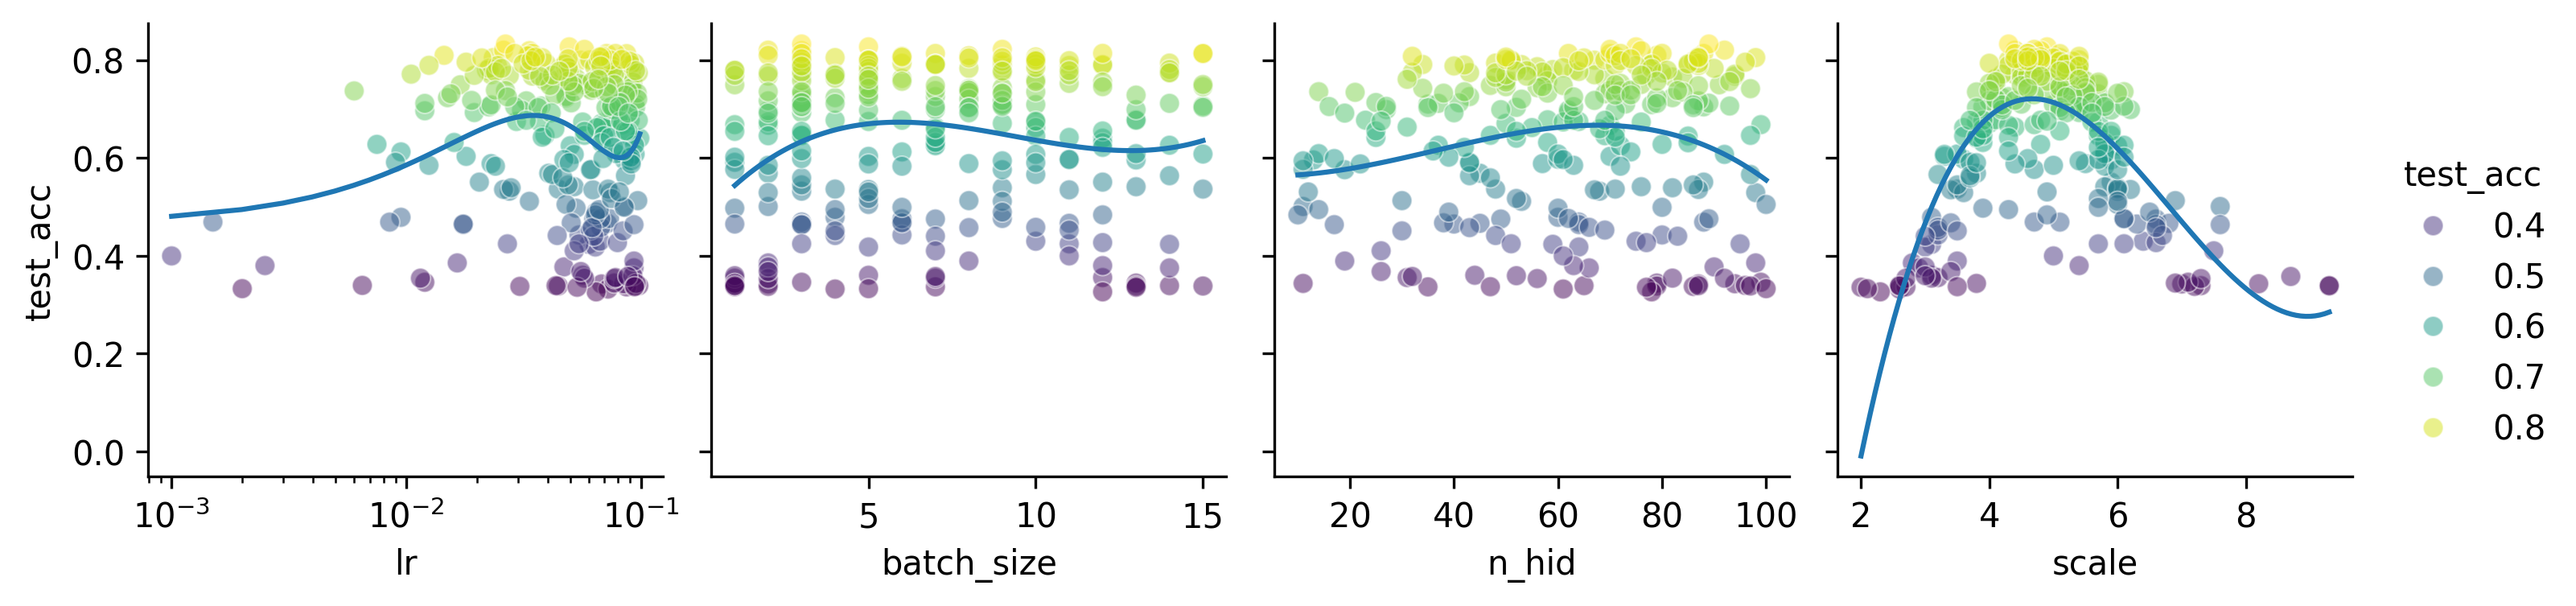

In [22]:
p_plot = sns.pairplot(
    plot_data,
    # x_vars={p for p in parameters if p not in ["model_type"]},
    x_vars=["lr", "batch_size", "n_hid", "scale"],
    y_vars=["test_acc"],
    hue="test_acc",
    kind="scatter",
    plot_kws=dict(alpha=0.5),
    palette="viridis",
)
# p_plot.fig.set_tight_layout(True)
p_plot.figure.dpi = 300
for model_type in plot_data["model_type"].unique():
    for ax in p_plot.axes[0]:
        f_data = plot_data[plot_data["model_type"] == model_type]
        x, y = ax.get_xlabel(), ax.get_ylabel()
        z = np.polyfit(f_data[x], f_data[y], 3)
        p = np.poly1d(z)
        x_values = np.linspace(min(f_data[x]), max(f_data[x]), 100)
        y_values = p(x_values)
        ax.plot(x_values, y_values)
        if x == "lr":
            ax.set_xscale("log")

        ax.legend().remove()

In [ ]:
_, new_axs = plt.subplots(3, 3, figsize=(15, 15))
for n_ax, ax in zip(new_axs.flatten(), p_plot.axes.flatten()):
    n_ax = ax

In [51]:
parameters.remove("batch_size")

['batch_size',
 'dropout',
 'gamma',
 'input_dropout',
 'lr',
 'model_type',
 'n_hid',
 'scale',
 'weight_decay']